In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

加载数据，预览数据

In [2]:
# 读取csv文件
df = pd.read_csv('../../data/fifa19/data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


查看数据的缺失值，并进行缺失值处理

In [3]:
df.isnull().any()

Unnamed: 0        False
ID                False
Name              False
Age               False
Photo             False
                  ...  
GKHandling         True
GKKicking          True
GKPositioning      True
GKReflexes         True
Release Clause     True
Length: 89, dtype: bool

In [4]:
# 将缺失值填充
new_df = df.fillna(0)
# 在判断是否有缺失值，以及每一列值的类型
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      18207 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
# 区别年龄等级
def age_level(t):
    if t < 20:
        return '20-'
    elif 20 <= t < 25:
        return '20-25'
    elif 25 <= t < 30:
        return "25-30"
    elif 30 <= t < 35:
        return "30-35"
    elif t >= 35:
        return "35+"
    else:
        return "ERROR"

new_df["age_level"] = new_df["Age"].map(age_level)
new_df.head() 

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,age_level
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,30-35
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,30-35
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,25-30
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,25-30
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,25-30


In [6]:
new_df['age_level'].value_counts()

20-25    6693
25-30    5928
30-35    3010
20-      2087
35+       489
Name: age_level, dtype: int64

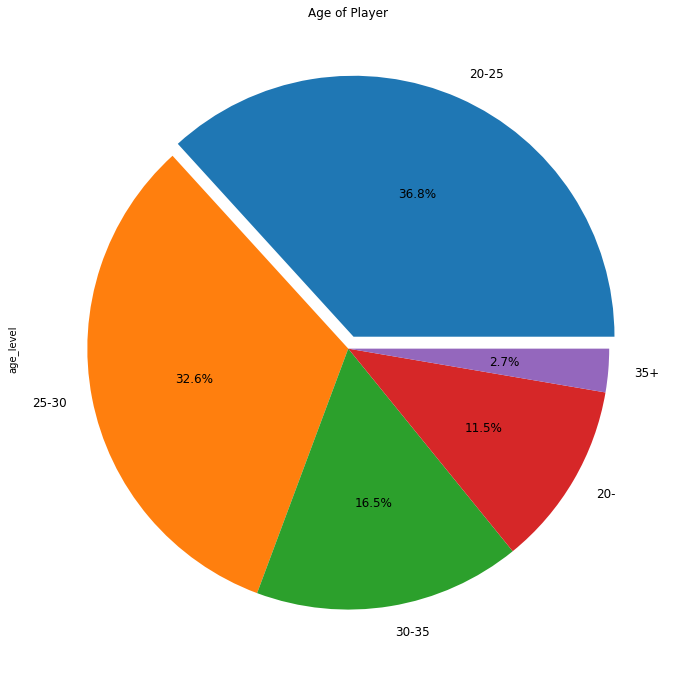

In [7]:
# 绘制饼图
explodes = (0.05, 0, 0, 0, 0)
new_df["age_level"].value_counts().plot.pie(title="Age of Player", explode=explodes, fontsize=12, figsize=(12, 12), autopct='%.1f%%')

以上利用线性数据分析了。球员年龄的分布情况。得出结论20-25岁时球员的黄金时间

以下了解运动员能力和薪资的关系

In [8]:
# 根据索引索取能力和薪资两列生成新的df
the_df = new_df.loc[:, ['Overall', 'Wage']]
the_df

,Overall,Wage
0,94,€565K
1,94,€405K
2,92,€290K
3,91,€260K
4,91,€355K
...,...,...
18202,47,€1K
18203,47,€1K
18204,47,€1K
18205,47,€1K


In [9]:
# 替换掉金钱符号和单位
the_df['Wage'] = the_df['Wage'].str.replace('€', '')
the_df['Wage'] = the_df['Wage'].str.replace('K', '')
the_df

,Overall,Wage
0,94,565
1,94,405
2,92,290
3,91,260
4,91,355
...,...,...
18202,47,1
18203,47,1
18204,47,1
18205,47,1


In [10]:
the_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  18207 non-null  int64 
 1   Wage     18207 non-null  object
dtypes: int64(1), object(1)
memory usage: 284.6+ KB


In [11]:
# Wage 类型转换
the_df = the_df.astype(int)

In [12]:
the_df['Wage'].value_counts()
# 删除之前填充的零值
the_df = the_df[~the_df['Wage'].isin([0])]

In [13]:
the_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17966 entries, 0 to 18206
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Overall  17966 non-null  int32
 1   Wage     17966 non-null  int32
dtypes: int32(2)
memory usage: 280.7 KB


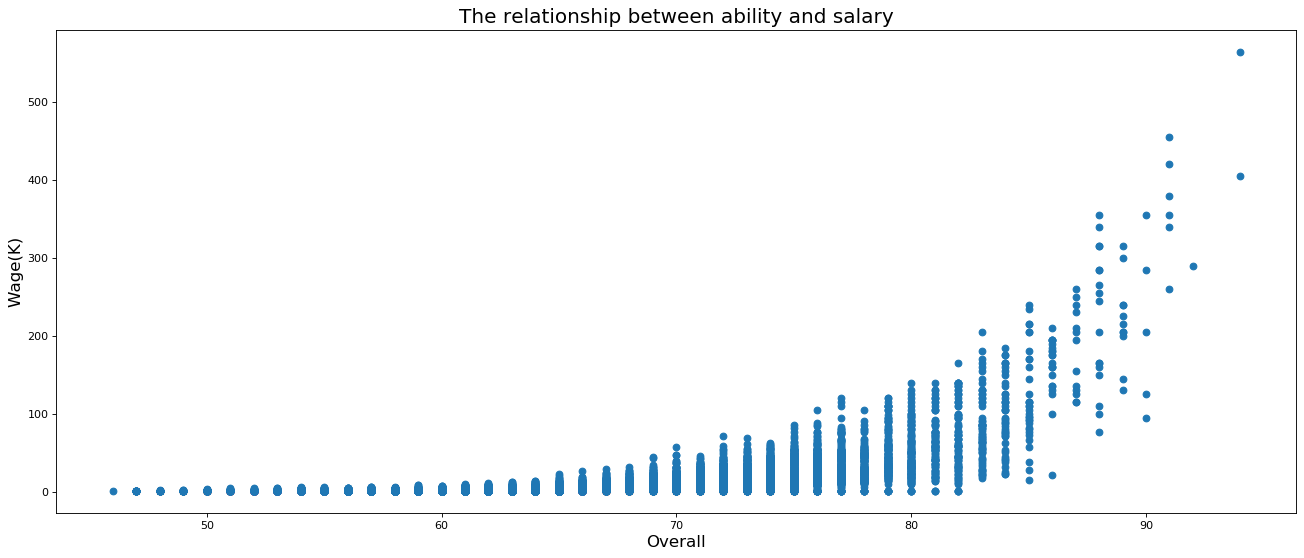

In [14]:
# 转化为列表，作为数据
x = the_df['Overall'].values.tolist()
y = the_df['Wage'].values.tolist()

plt.figure(figsize=(20, 8), dpi=80)
plt.title("The relationship between ability and salary", fontsize=18)
plt.scatter(x, y)
plt.ylabel('Wage(K)', fontsize=15)
plt.xlabel('Overall', fontsize=15)
plt.show()